In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [22]:
import glob
import rebound as reb
import scipy.stats as ss
import seaborn as sns

In [13]:
mearth = 0.000003003  # MSun
days = 1.0/365.25 # Yr

In [19]:
nstab = len(glob.glob('stable/*.bin'))
nunstab = len(glob.glob('unstable/*.bin'))
p = nstab/(nunstab+nstab)
print("Fraction of stable = {:.2f} +/- {:.2f}".format(p, sqrt(p*(1-p))/sqrt(nstab+nunstab)))

Fraction of stable = 0.41 +/- 0.02


In [20]:
Ps = []
Ms = []
for f in glob.glob('stable/*.bin'):
    sa = reb.SimulationArchive(f)
    Ps.append(sa[0].particles[-1].P)
    Ms.append(sa[0].particles[-1].m)
Ps = array(Ps)/days
Ms = array(Ms)/mearth

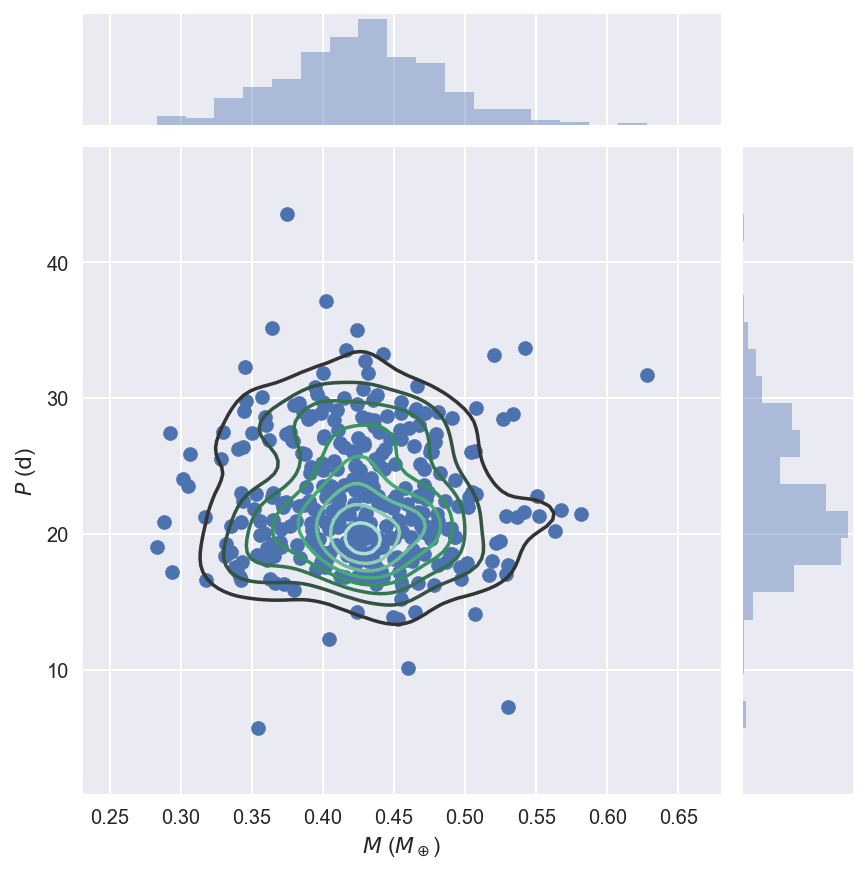

In [21]:
sns.jointplot(Ms, Ps, stat_func=None).plot_joint(sns.kdeplot).set_axis_labels(r'$M$ ($M_\oplus$)', r'$P$ ($\mathrm{d}$)')

/Users/farr/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


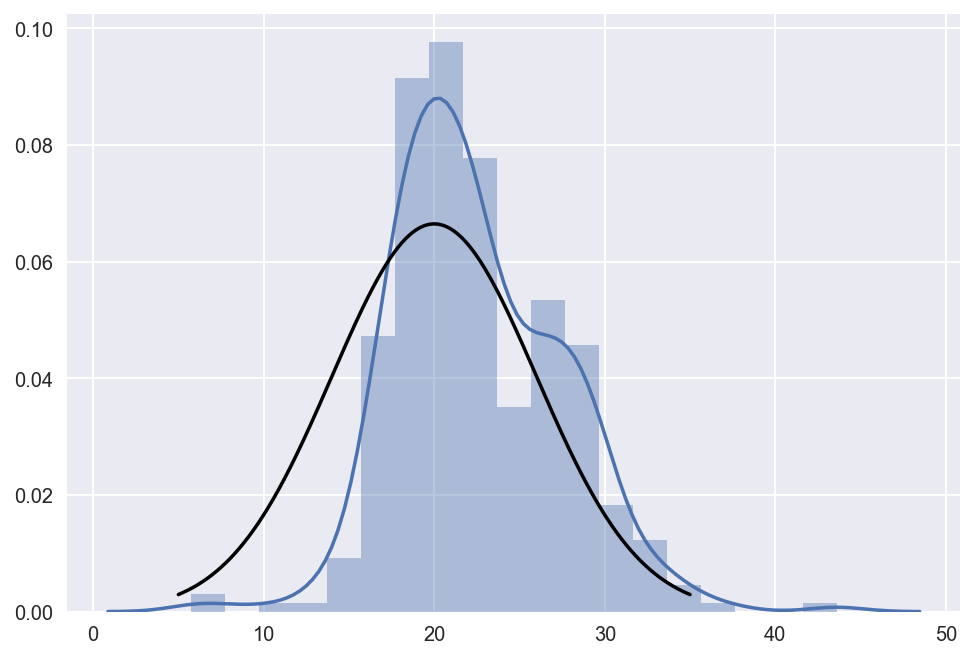

In [23]:
sns.distplot(Ps)
xs = linspace(5, 35, 1000)
plot(xs, ss.norm(20, 6).pdf(xs), color="k")

/Users/farr/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


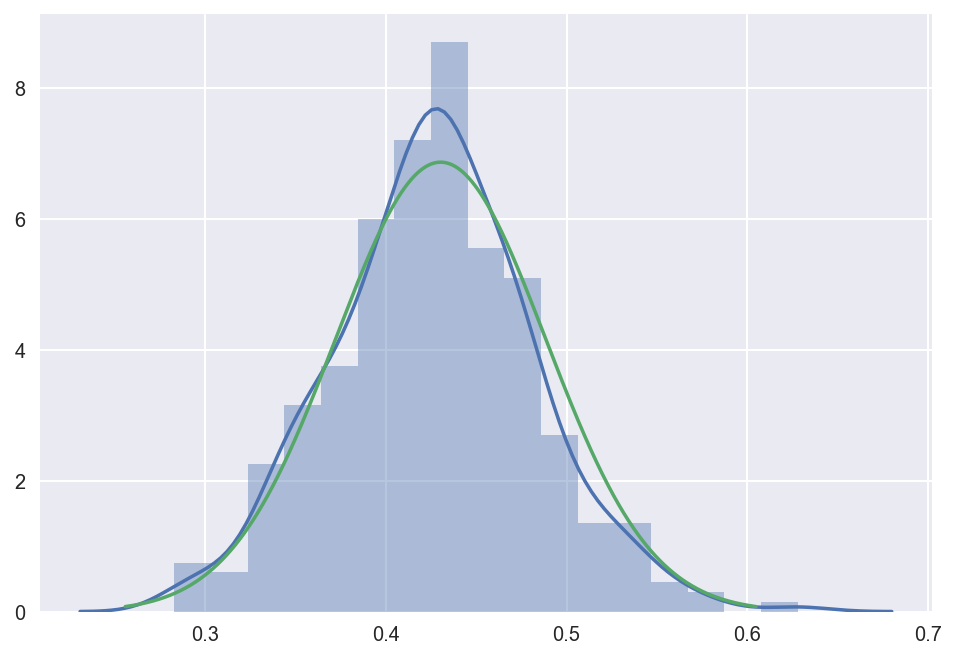

In [24]:
M0, dM0 = 0.755**3, 3.0*0.755**2*0.034
sns.distplot(Ms)
xs = linspace(M0-3*dM0, M0+3*dM0, 1000)
plot(xs, ss.norm(M0, dM0).pdf(xs))